In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from itertools import combinations
import matplotlib.dates as mdates


In [3]:
df = pd.read_csv("movimento.csv",low_memory=False)

In [16]:
df = df.dropna()

In [17]:
df.head()

,codi_pdi,ddoc_sai,cat_dpi,desc_pdi,nume_sai,vpro_msp,cncm_pdi
5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,"1,19",19053100
7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,"3,29",4012010
25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,"4,99",34029090
27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,"33,43",2012090
28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,"6,99",22021000


In [18]:
df = df.rename({'codi_pdi': 'cod_produto','ddoc_sai':'data_compra','cat_dpi':'categoria','desc_pdi':'desc_produto','nume_sai':'id_compra','vpro_msp':'valor_produto','cncm_pdi':'ncm_produto'}, axis = 1)

In [19]:
df

,cod_produto,data_compra,categoria,desc_produto,id_compra,valor_produto,ncm_produto
5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,"1,19",19053100
7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,"3,29",4012010
25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,"4,99",34029090
27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,"33,43",2012090
28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,"6,99",22021000
...,...,...,...,...,...,...,...
575208,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,"2,39",19053100
575209,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,"2,39",19053100
575210,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,"1,99",19053200
575211,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,"1,99",19053200


In [20]:
df['valor_produto'] = df['valor_produto'].str.replace(',','.')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192486 entries, 5 to 575212
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   cod_produto    192486 non-null  object
 1   data_compra    192486 non-null  object
 2   categoria      192486 non-null  object
 3   desc_produto   192486 non-null  object
 4   id_compra      192486 non-null  int64 
 5   valor_produto  192486 non-null  object
 6   ncm_produto    192486 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 11.7+ MB


In [24]:
df['valor_produto'] = df['valor_produto'].astype(float)

In [25]:
df

,cod_produto,data_compra,categoria,desc_produto,id_compra,valor_produto,ncm_produto
5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,1.19,19053100
7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,3.29,4012010
25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,33.43,2012090
28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...
575208,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
575209,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
575210,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200
575211,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200


In [58]:
df.to_csv('d:\dados\movimento.csv',index=False)

In [59]:
df = pd.read_csv('d:\dados\movimento.csv')

In [60]:
df

,Unnamed: 0,Unnamed: 0.1,cod_produto,data_compra,categoria,desc_produto,id_compra,valor_produto,ncm_produto
0,0,5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,1.19,19053100
1,1,7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,3.29,4012010
2,2,25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
3,3,27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,33.43,2012090
4,4,28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...,...,...
192481,192481,575208,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192482,192482,575209,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192483,192483,575210,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200
192484,192484,575211,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200


In [8]:
df.groupby('categoria')['valor_produto'].sum()

categoria
BEBIDAS            281850.42
CARNES             412420.37
CEREAIS            154559.32
HIGIENE_PESSOAL     71499.01
LATICINIOS         287669.16
LIMPEZA            135309.18
PET                 29421.12
Name: valor_produto, dtype: float64

In [56]:
df.describe()

,Unnamed: 0,cod_produto,id_compra,valor_produto,ncm_produto
count,192486.000000,1.924860e+05,192486.000000,192486.000000,1.924860e+05
mean,283320.564914,4.664099e+13,319261.537156,7.131576,1.866813e+07
std,165262.159694,3.884295e+13,83668.246397,11.746499,1.395073e+07
min,5.000000,3.800000e+01,7732.000000,0.570000,2.012020e+06
25%,140779.250000,7.420800e+04,267653.000000,2.590000,4.061010e+06
50%,278380.500000,7.898990e+13,338235.000000,3.990000,1.905320e+07
75%,425539.750000,7.898990e+13,377924.000000,7.730000,2.203000e+07
max,575212.000000,7.898990e+13,436874.000000,1296.840000,9.603900e+07


In [30]:
df.describe()

,Unnamed: 0,cod_produto,id_compra,valor_produto,ncm_produto
count,192486.000000,1.924860e+05,192486.000000,192486.000000,1.924860e+05
mean,283320.564914,4.664099e+13,319261.537156,7.131576,1.866813e+07
std,165262.159694,3.884295e+13,83668.246397,11.746499,1.395073e+07
min,5.000000,3.800000e+01,7732.000000,0.570000,2.012020e+06
25%,140779.250000,7.420800e+04,267653.000000,2.590000,4.061010e+06
50%,278380.500000,7.898990e+13,338235.000000,3.990000,1.905320e+07
75%,425539.750000,7.898990e+13,377924.000000,7.730000,2.203000e+07
max,575212.000000,7.898990e+13,436874.000000,1296.840000,9.603900e+07


In [5]:
df_cat = pd.read_csv("d:/dados/tabela_reduzida_ncm.csv",sep=";")

In [35]:
df_cat

,id,categoria,lista_cnm
0,1,CARNES,"20120,20130,20230,20312,20319,20329,20629,2071..."
1,2,BEBIDAS,"22011,22021,22030,22041,22042,22086,22060"
2,3,LATICINIOS,"40110,40120,40150,40610,19053"
3,4,LIMPEZA,"28289,68051,68053,39232,33029,96039,29039,3808..."
4,5,CEREAIS,"10063,90300,71333,71340,11010,17011,11062,1104..."
5,6,HIGIENE_PESSOAL,"33043,96019,96032,96033,34011,33051,33061,33071"
6,7,PET,"23099,42010"


In [36]:
df_cat

,id,categoria,lista_cnm
0,1,CARNES,"20120,20130,20230,20312,20319,20329,20629,2071..."
1,2,BEBIDAS,"22011,22021,22030,22041,22042,22086,22060"
2,3,LATICINIOS,"40110,40120,40150,40610,19053"
3,4,LIMPEZA,"28289,68051,68053,39232,33029,96039,29039,3808..."
4,5,CEREAIS,"10063,90300,71333,71340,11010,17011,11062,1104..."
5,6,HIGIENE_PESSOAL,"33043,96019,96032,96033,34011,33051,33061,33071"
6,7,PET,"23099,42010"


In [46]:
categorias = df_cat.sort_values(by='categoria')

In [48]:
categorias["categoria"]

1            BEBIDAS
0             CARNES
4            CEREAIS
5    HIGIENE_PESSOAL
2         LATICINIOS
3            LIMPEZA
6                PET
Name: categoria, dtype: object

In [40]:
qdcat = []
valor_categoria = df.groupby('categoria')['valor_produto'].sum()

In [49]:
lista_categoria = categorias["categoria"]

In [41]:
valor_categoria

categoria
BEBIDAS            281850.42
CARNES             412420.37
CEREAIS            154559.32
HIGIENE_PESSOAL     71499.01
LATICINIOS         287669.16
LIMPEZA            135309.18
PET                 29421.12
Name: valor_produto, dtype: float64

In [21]:
dfc

categoria
BEBIDAS            BEBIDASBEBIDASBEBIDASBEBIDASBEBIDASBEBIDASBEBI...
CARNES             CARNESCARNESCARNESCARNESCARNESCARNESCARNESCARN...
CEREAIS            CEREAISCEREAISCEREAISCEREAISCEREAISCEREAISCERE...
HIGIENE_PESSOAL    HIGIENE_PESSOALHIGIENE_PESSOALHIGIENE_PESSOALH...
LATICINIOS         LATICINIOSLATICINIOSLATICINIOSLATICINIOSLATICI...
LIMPEZA            LIMPEZALIMPEZALIMPEZALIMPEZALIMPEZALIMPEZALIMP...
PET                PETPETPETPETPETPETPETPETPETPETPETPETPETPETPETP...
Name: categoria, dtype: object

In [134]:
df = df.drop_duplicates()

In [141]:
df

,Unnamed: 0,cod_produto,categoria,desc_produto,id_compra,valor_produto,ncm_produto
data_compra,,,,,,,
2022-03-01,5,78989901987026,CARNES,BISC RECH 115GR GLUB,19929,1.19,19053100
2022-03-01,7,78989902002358,CARNES,LEITE DALIA INT 1LT,19930,3.29,4012010
2022-03-01,25,78989902006136,CARNES,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
2022-03-01,27,6081,CARNES,AGULHA BOV SO kg,19933,33.43,2012090
2022-03-01,28,71511,CARNES,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...
2022-03-31,575208,69176,CARNES,CISC TRAK CHOC BR 12,436874,2.39,19053100
2022-03-31,575209,69176,CARNES,CISC TRAK CHOC BR 12,436874,2.39,19053100
2022-03-31,575210,74208,CARNES,WAF ISABELA 100g CHO,436874,1.99,19053200


In [136]:
df.isnull().sum()

Unnamed: 0       0
cod_produto      0
categoria        0
desc_produto     0
id_compra        0
valor_produto    0
ncm_produto      0
dtype: int64

In [144]:
df1 = df.copy()

In [147]:
df_carnes = df1[df1['categoria']=='CARNES']

In [154]:
df_venda = df[['data_compra']].groupby('data_compra').count().reset_index()

In [161]:
df.drop_duplicates()

,Unnamed: 0,cod_produto,data_compra,categoria,desc_produto,id_compra,valor_produto,ncm_produto
0,5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,1.19,19053100
1,7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,3.29,4012010
2,25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
3,27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,33.43,2012090
4,28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...,...
192481,575208,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192482,575209,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192483,575210,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200
192484,575211,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200


In [13]:
data = df["data_compra"].unique()

In [14]:
dias = []
for i in data:
    dias.append(i[8:10])
print(dias)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


In [262]:
dias = data.astype(tymestamp)

NameError: name 'tymestamp' is not defined

In [15]:
quantidades = df.groupby("data_compra")["data_compra"].count()

In [247]:
quantidades[0]

6490

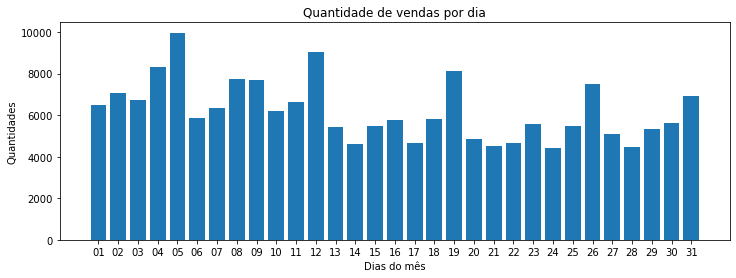

In [16]:
xdata = dias
ydata = quantidades
plt.figure().set_figwidth(12)
plt.bar(xdata, ydata, linestyle='solid') 
plt.xlabel('Dias do mês')
plt.ylabel('Quantidades')
plt.title("Quantidade de vendas por dia")
plt.show() 

In [18]:
valor = df.groupby("data_compra")["valor_produto"].sum()

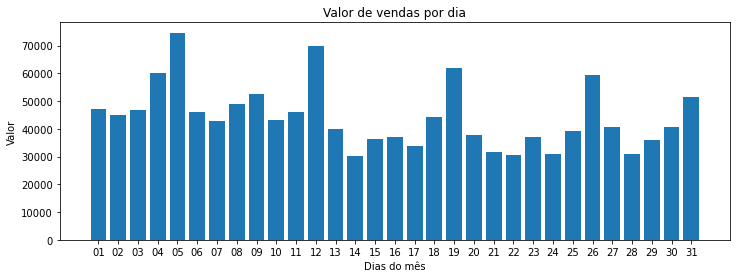

In [19]:
xdata = dias
ydata = valor
plt.figure().set_figwidth(12)
plt.bar(xdata, ydata, linestyle='solid') 
plt.xlabel('Dias do mês')
plt.ylabel('Valor')
plt.title("Valor de vendas por dia")
plt.show() 

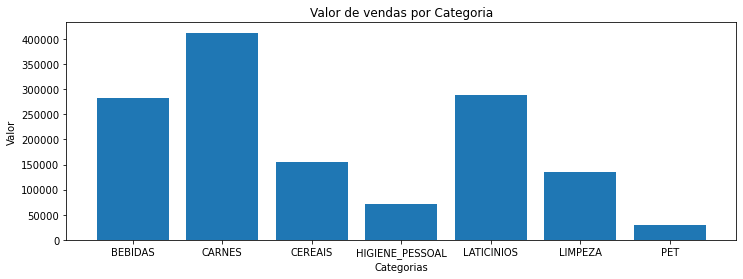

In [50]:
xdata = lista_categoria
ydata = valor_categoria
plt.figure().set_figwidth(12)
plt.bar(xdata, ydata, linestyle='solid') 
plt.xlabel('Categorias')
plt.ylabel('Valor')
plt.title("Valor de vendas por Categoria")
plt.show() 

In [76]:
categoria_valor = df.groupby(["categoria","categoria"])["valor_produto"].sum()

In [62]:
categoria_valor = df.groupby(["categoria","categoria"])["valor_produto"].sum()

In [63]:
categoria_valor

categoria        categoria      
BEBIDAS          BEBIDAS            281850.42
CARNES           CARNES             412420.37
CEREAIS          CEREAIS            154559.32
HIGIENE_PESSOAL  HIGIENE_PESSOAL     71499.01
LATICINIOS       LATICINIOS         287669.16
LIMPEZA          LIMPEZA            135309.18
PET              PET                 29421.12
Name: valor_produto, dtype: float64

In [77]:
categoria_valor.describe()

count         7.000000
mean     196104.082857
std      136174.493201
min       29421.120000
25%      103404.095000
50%      154559.320000
75%      284759.790000
max      412420.370000
Name: valor_produto, dtype: float64

In [70]:
X

,Unnamed: 0,cod_produto,data_compra,desc_produto,id_compra,valor_produto,ncm_produto
0,5,78989901987026,2022-03-01,BISC RECH 115GR GLUB,19929,1.19,19053100
1,7,78989902002358,2022-03-01,LEITE DALIA INT 1LT,19930,3.29,4012010
2,25,78989902006136,2022-03-01,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
3,27,6081,2022-03-01,AGULHA BOV SO kg,19933,33.43,2012090
4,28,71511,2022-03-01,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...
192481,575208,69176,2022-03-31,CISC TRAK CHOC BR 12,436874,2.39,19053100
192482,575209,69176,2022-03-31,CISC TRAK CHOC BR 12,436874,2.39,19053100
192483,575210,74208,2022-03-31,WAF ISABELA 100g CHO,436874,1.99,19053200
192484,575211,74208,2022-03-31,WAF ISABELA 100g CHO,436874,1.99,19053200


In [7]:
result = pd.DataFrame(lista_categoria)

NameError: name 'lista_categoria' is not defined

In [118]:
dfe = pd.DataFrame(lista_categoria)

In [102]:
dfe = pd.concat([lista_categoria,valor_categoria],ignore_index = False)

C:\Users\deive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valor_produto'>

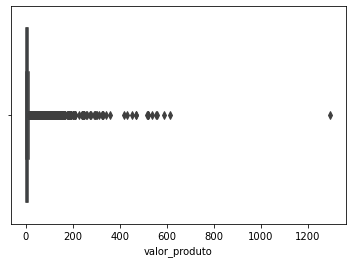

In [11]:
import seaborn as sns
sns.boxplot(df['valor_produto'])

In [14]:
df_filtered = df[(df["valor_produto"] < 1000.0)]

C:\Users\deive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valor_produto'>

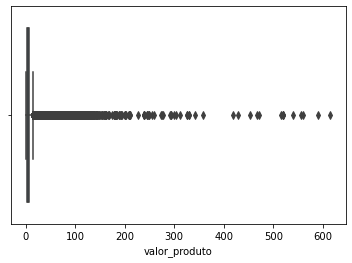

In [16]:
sns.boxplot(df_filtered['valor_produto'])

In [17]:
from scipy import stats

In [19]:
z = np.abs(stats.zscore(df['valor_produto']))
print(z.head(10))

0    0.505818
1    0.327041
2    0.182317
3    2.238837
4    0.012053
5    0.327041
6    0.134643
7    0.256381
8    0.267449
9    0.728595
Name: valor_produto, dtype: float64


In [54]:
df

,Grade,Salary
0,50,50000
1,50,54000
2,46,50000
3,95,189000
4,50,55000
5,5,40000
6,57,59000
7,42,42000
8,26,47000
9,72,78000


In [42]:
compras = pd.read_csv("d:\dados\consumo_compra_itens.csv",sep=";")

In [65]:
df['']

,Unnamed: 0,Unnamed: 0.1,cod_produto,data_compra,categoria,desc_produto,id_compra,valor_produto,ncm_produto
0,0,5,78989901987026,2022-03-01,LATICINIOS,BISC RECH 115GR GLUB,19929,1.19,19053100
1,1,7,78989902002358,2022-03-01,LATICINIOS,LEITE DALIA INT 1LT,19930,3.29,4012010
2,2,25,78989902006136,2022-03-01,LIMPEZA,L.R UZZILIM 1kg LAVA,19933,4.99,34029090
3,3,27,6081,2022-03-01,CARNES,AGULHA BOV SO kg,19933,33.43,2012090
4,4,28,71511,2022-03-01,BEBIDAS,REF 3LT FANTA GUARAN,19933,6.99,22021000
...,...,...,...,...,...,...,...,...,...
192481,192481,575208,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192482,192482,575209,69176,2022-03-31,LATICINIOS,CISC TRAK CHOC BR 12,436874,2.39,19053100
192483,192483,575210,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200
192484,192484,575211,74208,2022-03-31,LATICINIOS,WAF ISABELA 100g CHO,436874,1.99,19053200


In [44]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42517 entries, 0 to 42516
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_compra  42517 non-null  int64 
 1   itens      42517 non-null  object
dtypes: int64(1), object(1)
memory usage: 664.5+ KB


In [50]:
compras_10 = compras.itens.drop_duplicates().head(10)

In [51]:
compras_10

0                                               BISC
1                                              LEITE
2                                     AGULHA,L.R,REF
4                                          QJO,REMOV
5     ACUCAR,ARROZ,BISC,BOMBOM,CISC,L.R,LLOUCA,MOIDA
6                                   AG.SARANDI,REFRI
7                                                QJO
8                                                FAR
9                                             COROTE
10                                              AGUA
Name: itens, dtype: object

In [205]:
from matplotlib import pyplot as plt
import pandas as pd

df2 = 

df2['(x_i - x_mean)'] = df2['Grade'] - df2['Grade'].mean()
df2['(y_i - y_mean)'] = df2['Salary'] - df2['Salary'].mean()
df2['(x_i - x_mean)(y_i - y_mean)'] = df2['(x_i - x_mean)'] * df2['(y_i - y_mean)']
df2['(x_i - x_mean)^2'] = (df2['Grade'] - df2['Grade'].mean())**2

m = (sum(df2['(x_i - x_mean)'] * df2['(y_i - y_mean)'])) / sum(df2['(x_i - x_mean)^2'])
b = df2['Salary'].mean() - (m * df2['Grade'].mean())

regression_line = [(m*x) + b for x in df['Grade']]

plt.figure(figsize=(10, 7))
plt.scatter(df2.Grade, df2.Salary, color='g')
plt.plot(df2.Grade, regression_line, color='b')
plt.title('Grades vs Salaries | Ordinary Least Squares: OLS')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.grid()
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_17192/4217721270.py, line 4)

In [185]:
dfd = df.groupby(['data_compra'],as_index=False).agg({'valor_produto':'sum'})

In [187]:
dfd['data_compra'] = pd.to_datetime(dfd['data_compra'])

In [188]:
dfd['data_compra'].dt.day

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
Name: data_compra, dtype: int64

In [189]:
dfd['data_compra'] = dfd['data_compra'].dt.day

In [190]:
dfd.rename(columns={'data_compra': 'dia_compra'}, inplace = True)

In [191]:
dfd

,dia_compra,valor_produto
0,1,47020.98
1,2,45015.73
2,3,46633.62
3,4,59985.23
4,5,74646.46
5,6,46041.47
6,7,42743.17
7,8,49099.38
8,9,52427.51
9,10,43122.57


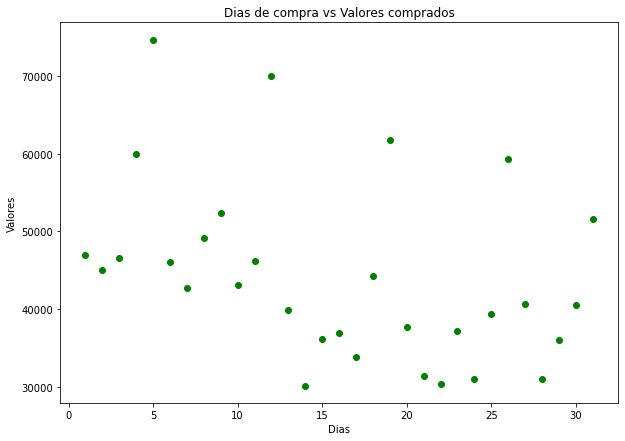

In [192]:
plt.figure(figsize=(10, 7))
plt.scatter(dfd.dia_compra, dfd.valor_produto, color='g')
plt.title('Dias de compra vs Valores comprados')
plt.xlabel('Dias')
plt.ylabel('Valores')
plt.show()

In [201]:
dfd['(x_i - x_mean)'] = dfd['dia_compra'] - dfd['dia_compra'].mean()
dfd['(y_i - y_mean)'] = dfd['valor_produto'] - dfd['valor_produto'].mean()
dfd['(x_i - x_mean)(y_i - y_mean)'] = dfd['(x_i - x_mean)'] * dfd['(y_i - y_mean)']
dfd['(x_i - x_mean)^2'] = (dfd['dia_compra'] - dfd['dia_compra'].mean())**2

m = (sum(dfd['(x_i - x_mean)'] * dfd['(y_i - y_mean)'])) / sum(dfd['(x_i - x_mean)^2'])
b = dfd['valor_produto'].mean() - (m * dfd['dia_compra'].mean())

print("Angular Coefficient (m): {0}\nLinear Coefficient (b): {1}".format(round(m), round(b)))

Angular Coefficient (m): -479
Linear Coefficient (b): 51953


In [194]:
dfd['Error'] = dfd['valor_produto'] - dfd['valor_produto'].mean()
dfd['Squared Errors'] = dfd['Error']**2
print(dfd)
print("Sum of Squared Errors (SSE): ", round(sum(dfd['Squared Errors'])))

    dia_compra  valor_produto  (x_i - x_mean)  (y_i - y_mean)  \
0            1       47020.98           -15.0     2739.412903   
1            2       45015.73           -14.0      734.162903   
2            3       46633.62           -13.0     2352.052903   
3            4       59985.23           -12.0    15703.662903   
4            5       74646.46           -11.0    30364.892903   
5            6       46041.47           -10.0     1759.902903   
6            7       42743.17            -9.0    -1538.397097   
7            8       49099.38            -8.0     4817.812903   
8            9       52427.51            -7.0     8145.942903   
9           10       43122.57            -6.0    -1158.997097   
10          11       46166.32            -5.0     1884.752903   
11          12       70014.75            -4.0    25733.182903   
12          13       39968.14            -3.0    -4313.427097   
13          14       30219.62            -2.0   -14061.947097   
14          15       3622

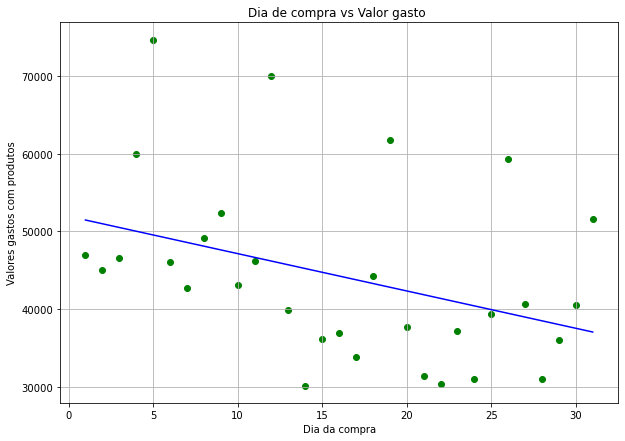

In [203]:
dfd['(x_i - x_mean)'] = dfd['dia_compra'] - dfd['dia_compra'].mean()
dfd['(y_i - y_mean)'] = dfd['valor_produto'] - dfd['valor_produto'].mean()
dfd['(x_i - x_mean)(y_i - y_mean)'] = dfd['(x_i - x_mean)'] * dfd['(y_i - y_mean)']
dfd['(x_i - x_mean)^2'] = (dfd['dia_compra'] - dfd['dia_compra'].mean())**2

m = (sum(dfd['(x_i - x_mean)'] * dfd['(y_i - y_mean)'])) / sum(dfd['(x_i - x_mean)^2'])
b = dfd['valor_produto'].mean() - (m * dfd['dia_compra'].mean())

regression_line = [(m*x) + b for x in dfd['dia_compra']]

plt.figure(figsize=(10, 7))
plt.scatter(dfd.dia_compra, dfd.valor_produto, color='g')
plt.plot(dfd.dia_compra, regression_line, color='b')
plt.title('Dia de compra vs Valor gasto ')
plt.xlabel('Dia da compra')
plt.ylabel('Valores gastos com produtos')
plt.grid()
plt.show()